# Notebook 2 Tutorial: Continued Apartment Price Prediction


## Read in the Data

The first two cells below, you can simply run - they provide a starting point. 

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset
data = [
    {"size": 19, "price": 440, "rooms": 1, "distance_to_center": 7, "location": "Nienberge"},
    {"size": 32, "price": 500, "rooms": 1, "distance_to_center": 5.5, "location": "Gremmendorf"},
    {"size": 69, "price": 810, "rooms": 3, "distance_to_center": 5.5, "location": "Münster-Südost"},
    {"size": 60, "price": 900, "rooms": 2, "distance_to_center": 5.5, "location": "Münster-West"},
    {"size": 20, "price": 500, "rooms": 1, "distance_to_center": 1.5, "location": "Hansaviertel"},
    {"size": 18, "price": 660, "rooms": 1, "distance_to_center": 2.5, "location": "Münster Mitte-Nordost"},
    {"size": 52, "price": 790, "rooms": 3, "distance_to_center": 1, "location": "Münster City Center"},
    {"size": 45, "price": 1795, "rooms": 2, "distance_to_center": 1, "location": "Boeselagerstraße"},
    {"size": 50, "price": 1895, "rooms": 2, "distance_to_center": 1, "location": "Julius-Leber-Straße"}
]

# Step 1: Extract the features (size and distance_to_center) and target (price) from the dictionaries
sizes = np.array([apt['size'] for apt in data])  # Feature 1: size of the apartment
distances = np.array([apt['distance_to_center'] for apt in data])  # Feature 2: distance to city center
prices = np.array([apt['price'] for apt in data])  # Target variable: price of the apartment
rooms = np.array([apt['rooms'] for apt in data])  # Target variable: price of the apartment

# Step 2: Create the input matrix X with a column of 1s for the intercept
X = np.column_stack((np.ones(sizes.shape[0]), sizes, distances))
Y = np.column_stack((prices, rooms))

print(X[:,0].shape, Y.shape)
print("Input: ", X[:,1])
print("Output: ", Y[:,0])

(9,) (9, 2)
Input:  [19. 32. 69. 60. 20. 18. 52. 45. 50.]
Output:  [ 440  500  810  900  500  660  790 1795 1895]


In [6]:
def mean_squared_error(y_true, y_pred):
    """
    Calculate the Mean Squared Error between the actual and predicted values.

    Parameters:
    - y_true: array-like, actual values (ground truth)
    - y_pred: array-like, predicted values

    Returns:
    - mse: float, the mean squared error
    """
    # Ensure inputs are NumPy arrays for element-wise operations
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate the squared differences
    squared_differences = (y_true - y_pred) ** 2
    
    # Return the mean of the squared differences
    mse = np.mean(squared_differences)
    return mse

---

## 2.1 Gradient Descent 

When manually adjusting the slope and intercept (in the last tasks of the preceding week) using sliders to find a good fit for a linear regression model, you're essentially trying to minimize the error (in this case, the Mean Squared Error (MSE)) between the predicted values and the actual values. Instead of adjusting parameters manually, we can automate this process using an iterative algorithm like gradient descent, which is commonly used for optimizing functions.

### Concept of Gradient Descent for Linear Regression

Gradient descent is an optimization algorithm used to minimize a cost function (in this case, MSE). It works by iteratively adjusting the parameters (slope and intercept) in the direction of the steepest descent (i.e., the negative gradient of the cost function) until it finds a local minimum.

How Gradient Descent Works:

1. Initialize the parameters: Start with some initial values for the slope $(m)$ and intercept $(b)$.
2. Compute the error (MSE): Calculate the MSE for the current parameters.
3. Update the parameters: Change the parameters in such a way that the MSE is getting smaller. You can use the gradients (partial derivatives) of the cost function with respect to $m$ and $b$ to adjust the parameters in small steps. The size of the step is controlled by a learning rate $(\alpha)$.
4. Repeat: Continue updating the parameters iteratively until the error stops decreasing (i.e., converges).

In the two following tasks, you will go through these four steps. Only step three will be different in the two versions.

**First sub-task: Brute-force search for better parameters**

Tasks:

* Start with (small) initial values;
* Compute error for current parameters;
* For each of the parameter: slightly adjust each parameter individually and compute after each small adaptation the MSE again. If the error decreased, stick with the newly selected parameter.
* repeat ...

This approach is simpler than gradient descent but still allows you to iteratively find a better solution by trying out small adjustments to the parameters. You can fine-tune the step size and the number of iterations to balance between speed and accuracy.

In [11]:
class SimpleGradientDescentModel:
    """
    A simple linear regression model that adjusts the slope (m) and intercept (b)
    using brute-force approach, slightly adjusting the values in each iteration to minimize MSE.
    It updates the weights (slope and intercept) after processing each sample.
    """
    
    def __init__(self, initial_m=0, initial_b=0, learning_rate=0.01, step_size = 0.01, n_iterations=1000):
        self.slope = initial_m  # Initialize slope (m)
        self.intercept = initial_b  # Initialize intercept (b)
        self.step_size = step_size  # Step size for brute-force adjustment
        self.n_iterations = n_iterations  # Number of iterations for adjustment
        self.mse_history = []  # List to store MSE at each iteration

    def fit(self, X, y):
        """
        Fit the model using brute-force adjustment. Adjust slope and intercept iteratively.

        Parameters:
        X : list or array-like, shape (n_samples,)
            The independent variable (e.g., size of apartments).
        y : list or array-like, shape (n_samples,)
            The dependent variable (e.g., price of apartments).
        """
        n = len(X)  # Number of data points

        for i in range(self.n_iterations):
            total_mse = 0
            for j in range(n):
                # Predict using the current slope and intercept for this sample
                y_pred = self.slope * X[j] + self.intercept
                current_mse = mean_squared_error(y[j], y_pred)# MSE for the current sample
                
                # Try adjusting the slope (m) by a small amount
                new_m = self.slope + self.step_size
                new_y_pred_m = new_m * X[j] + self.intercept
                new_mse_m = mean_squared_error(y[j], new_y_pred_m)

                # If the error decreased, accept the new slope
                if new_mse_m < current_mse:
                    self.slope = self.slope + self.step_size
                else:
                    self.slope = self.slope - self.step_size

                # Try adjusting the intercept (b) by a small amount
                new_b = self.intercept + self.step_size
                new_y_pred_b = self.slope * X[j] + new_b
                new_mse_b = mean_squared_error(y[j],  new_y_pred_b)

                # If the error decreased, accept the new intercept
                if new_mse_b < current_mse:
                    self.intercept = self.intercept + self.step_size
                else:
                    self.intercept = self.intercept - self.step_size

                # Accumulate the MSE before the current iteration
                total_mse += current_mse

            # Calculate the average MSE for the entire dataset after one pass
            avg_mse = total_mse / n
            self.mse_history.append(avg_mse)

            # Optionally, print the status every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}: MSE = {avg_mse:.4f}, m = {self.slope:.4f}, b = {self.intercept:.4f}")

    def predict(self, X):
        """
        Predict method for making predictions using the trained model.

        Parameters:
        X : list or array-like, shape (n_samples,)
            New data (independent variable) to predict the dependent variable.

        Returns:
        predictions : list
            Predicted values based on the model's slope and intercept.
        """
        predictions = []
        for x in X:
            predictions.append(self.slope * x + self.intercept)
        return predictions

    def get_mse_history(self):
        """
        Get the history of MSE values during the learning process.

        Returns:
        mse_history : list
            A list of MSE values recorded at each iteration.
        """
        return self.mse_history


### Visualization of learning

A training curve shows how the error developed during training (it should go down). In this case, the MSE is used and decreases significantly during the early iterations as the model adjusts the slope and intercept to minimize the error. After a certain number of iterations, the MSE stabilizes and no longer decreases, indicating that the model has reached a relatively optimal solution.

Characteristics of a training / learning curve:

* Monitoring Convergence: The training curve helps to visualize whether the model is converging, i.e., if the error is decreasing as the number of iterations increases. A flat curve after some iterations suggests that the model has likely converged to a solution.
* Hyperparameter Tuning: By observing the training curve, you can adjust hyperparameters like the learning rate or the number of iterations to ensure the model trains effectively without too many or too few updates.

Task:

* plot a learning curve

Iteration 0: MSE = 1110273.4170, m = 0.0900, b = 0.0900
Iteration 100: MSE = 515727.3170, m = 9.0900, b = 9.0900
Iteration 200: MSE = 297789.8822, m = 15.2900, b = 18.0900
Iteration 300: MSE = 274182.5911, m = 16.2900, b = 27.0900
Iteration 400: MSE = 256130.4111, m = 17.2900, b = 36.0900
Iteration 500: MSE = 243633.3422, m = 18.2900, b = 45.0900
Iteration 600: MSE = 236691.3844, m = 19.2900, b = 54.0900
Iteration 700: MSE = 234822.4452, m = 19.8500, b = 62.7900
Iteration 800: MSE = 233963.6047, m = 19.4300, b = 70.9300
Iteration 900: MSE = 233411.3155, m = 18.9900, b = 79.0700
MSE History: [np.float64(1110273.417011111), np.float64(1102685.1302111112), np.float64(1095130.0318111111), np.float64(1087608.1218111112), np.float64(1080119.4002111112), np.float64(1072663.8670111112), np.float64(1065241.5222111112), np.float64(1057852.365811111), np.float64(1050496.397811111), np.float64(1043173.618211111), np.float64(1035884.0270111109), np.float64(1028627.624211111), np.float64(1021404.409

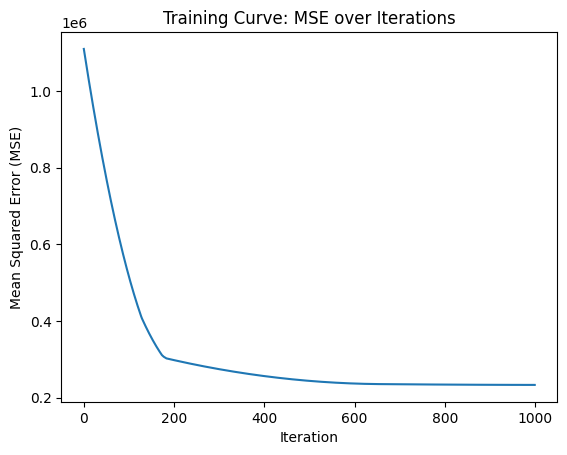

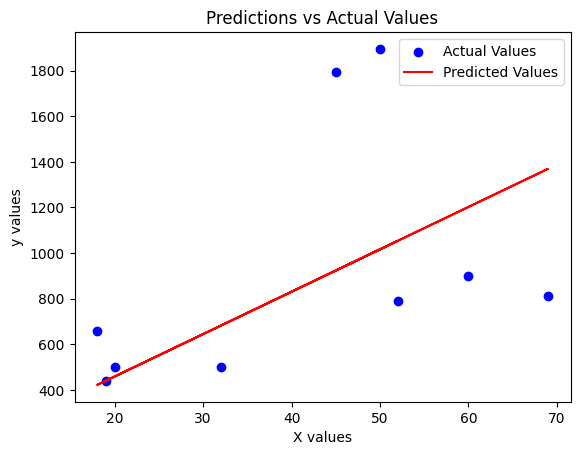

In [12]:
# Training the model on our apartment data:
model = SimpleGradientDescentModel(learning_rate=0.01, n_iterations=1000)
model.fit(X[:,1], Y[:,0])

# Retrieve the MSE history
mse_history = model.get_mse_history()
predictions = model.predict(X[:,1])

# TODO: Plot a learning curve - how the error develops over training / time
# and plot actual vs. predicted data again
print("MSE History:", mse_history)

# Assume mse_history contains the recorded MSE over iterations
plt.plot(mse_history)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Curve: MSE over Iterations')
plt.show()

# Assume you have predicted values and actual values
plt.scatter(X[:,1], Y[:,0], color='blue', label='Actual Values')
plt.plot(X[:,1], predictions, color='red', label='Predicted Values')
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()



**Second sub-task: Gradient descent**

You should now use the real gradient -- we are interested in how the error (in our case the MSE) is changing depending on the current weights. Therefore, we can use the gradient of the error with respect to a weight and this gives us a direction in which the error would increase.

Tasks:

* Start with (small) initial values;
* Compute error for current parameters;
* Calculate gradients: Compute the partial derivatives (gradients) of the MSE with respect to $m$ (slope) and $b$ (intercept).
* Update parameters: Adjust the values of $m$ and $b$ using the gradients. The amount by which you adjust the parameters is controlled by a learning rate (start with a small value, e.g., $\alpha = 0.0001$ and run for a couple of thousand iterations).
* Repeat: Continue adjusting the parameters iteratively until the error converges to a minimum. 

This approach is simpler than gradient descent but still allows you to iteratively find a better solution by trying out small adjustments to the parameters. You can fine-tune the step size and the number of iterations to balance between speed and accuracy.

*Formulae for Gradient Descent* 

For linear regression, the MSE is defined as:

$$
\text{MSE}(m, b) = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i})^2
$$

Where

* $y_{\text{pred}, i} = m \cdot x_i + b$

*The partial derivatives of the cost function (MSE) are:*

* Gradient with respect to $m$ (slope): $\frac{\partial}{\partial m} = -\frac{2}{n} \sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i}) \cdot x_i$

* Gradient with respect to $b$ (intercept): $\frac{\partial}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i})$

*Gradient Descent Updates:*

The update rules for the slope $m$ and intercept $b$ are:


* $m = m - \alpha \cdot \frac{\partial}{\partial m} \text{MSE}(m, b)$

* $b = b - \alpha \cdot \frac{\partial}{\partial b} \text{MSE}(m, b)$


In [13]:
class GradientDescentModel:
    """
    A simple linear regression model that performs gradient descent manually.
    It loops over each example, adjusts the slope (m) and intercept (b), 
    and calculates the gradient manually to update the parameters.
    """
    
    def __init__(self, learning_rate=0.0001, n_iterations=1000):
        self.slope = 0.1  # Initialize slope (m) to 0
        self.intercept = 0.1  # Initialize intercept (b) to 0
        self.learning_rate = learning_rate  # Set learning rate for gradient descent
        self.n_iterations = n_iterations  # Set number of iterations for gradient descent
        self.mse_history = []  # List to store MSE at each iteration

    def fit(self, X, y):
        """
        Fit the model using gradient descent. Adjust slope and intercept iteratively.

        Parameters:
        X : list or array-like, shape (n_samples,)
            The independent variable (e.g., size of apartments).
        y : list or array-like, shape (n_samples,)
            The dependent variable (e.g., price of apartments).
        """
        n = len(X)  # Number of data points
        
        for i in range(self.n_iterations):
            # NEW: We will store gradient steps for a sample
            # In your first test this will not do much:
            # We still change our parameters after each sample from X,
            # therefore the inner loop 
            gradient_slope = 0.
            gradient_intercept = 0.

            for i in range(n):
                # TODO: Calculate gradients and change slope and intercept.
                # Predict current sample using the current slope and intercept
                y_pred = self.slope * X[i] + self.intercept
                # Calculate the gradients for slope and intercept
                gradient_slope += -2 * X[i] * (y[i] - y_pred) 
                gradient_intercept += -2 * (y[i] - y_pred)
                # Update the slope and intercept using the gradients
                self.slope -= self.learning_rate * gradient_slope 
                self.intercept -= self.learning_rate * gradient_intercept 

            # Calculate Mean Squared Error for the current iteration and store it
            self.mse_history.append(mean_squared_error(y, self.predict(X)))

            # Optionally, print the status every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}: MSE = {mean_squared_error(y, self.predict(X)):.4f}, m = {self.slope:.4f}, b = {self.intercept:.4f}")


    def fit_vector(self, X, y):
        """
        Fit the model using gradient descent. Adjust slope and intercept iteratively.

        Parameters:
        X : list or array-like, shape (n_samples,)
            The independent variable (e.g., size of apartments).
        y : list or array-like, shape (n_samples,)
            The dependent variable (e.g., price of apartments).
        """
        n = len(X)  # Number of data points
        
        for i in range(self.n_iterations):
            # TODO B - LATER PART OF TASK AFTER THE FIRST VERSION IS RUNNING AND EVALUATED
            # For stabler gradient updates we collect information on many samples
            # - these are simply all integrated in gradient slope and 
            # afterwards we calculate the mean
            # You can start with experimenting first in the loop  and collecting the values in these 
            # or simply calculate these directly ...
            #gradient_slope = 0.
            #gradient_intercept = 0.

            # TODO B: Instead of a loop use a vector notation 
            # (which is much more efficient as well)
            y_pred = self.slope * X + self.intercept
            # Calculate the gradients for slope and intercept
            # TODO B - basically adapt your code from above, without the loop index and sum all the gradients (np.sum() - 
            # and don't forget to divide by the number of summed gradients)
            gradient_slope = (-2/n) * np.sum(X*(y - y_pred)) 
            gradient_intercept = -2/n * np.sum(y - y_pred)
            # Update the slope and intercept using the gradients
            self.slope -= self.learning_rate * gradient_slope 
            self.intercept -= self.learning_rate * gradient_intercept 

            # Calculate Mean Squared Error for the current iteration and store it
            self.mse_history.append(mean_squared_error(y, y_pred))

            # Optionally, print the status every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}: MSE = {mean_squared_error(y, self.predict(X)):.4f}, m = {self.slope:.4f}, b = {self.intercept:.4f}")


    def predict(self, X):
        """
        Predict method for making predictions using the trained model.

        Parameters:
        X : list or array-like, shape (n_samples,)
            New data (independent variable) to predict the dependent variable.

        Returns:
        predictions : list
            Predicted values based on the model's slope and intercept.
        """
        return [self.slope * x + self.intercept for x in X]
    
    def get_mse_history(self):
        """
        Get the history of MSE values during the learning process.

        Returns:
        mse_history : list
            A list of MSE values recorded at each iteration.
        """
        return self.mse_history


Use your code for visualization from above. Important: for gradient descent the learning rate is usually a quite sensitive parameter. 

* Start initially with a very small value `(learning_rate=0.000005, n_iterations=100)`. What is the disadavantage of a small learning rate?
* Try slightly increasing the learning rate -- when is this breaking down and what do you observe when getting close to that learning rate?

In the code above there is a second fit method -- `fit_vector`. You should implement this now: the task is to remove the for iteration over the training and make this more efficient. But in addition, we are not updating the weights after every single example and change them. Instead, we calculate in a way over the training data set for each example a suggestion in which direction and how much the gradients should be moved and only in the end find a consensus. 

Consider, how computing whole batches for a gradient update improves training:

* again, test different learning rates
* observe how training progresses and compare to using updates after each single sample.

Further analysis:

* Try for a good learning rate (fast learning and stable), try different initial values for the weights. What changes?
* Can you find initial values that break again learning?
* How do you explain this? Why is the system "sometimes" diverging?

Iteration 0: MSE = 1072615.1120, m = 0.5121, b = 0.1092
Iteration 100: MSE = 258055.6013, m = 18.2322, b = 0.5416
Iteration 200: MSE = 242734.7387, m = 20.6606, b = 0.6586
Iteration 300: MSE = 242437.9555, m = 20.9923, b = 0.7323
Iteration 400: MSE = 242423.5976, m = 21.0366, b = 0.8001


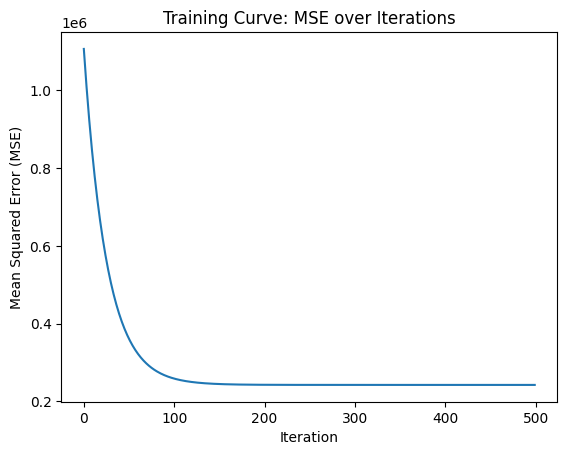

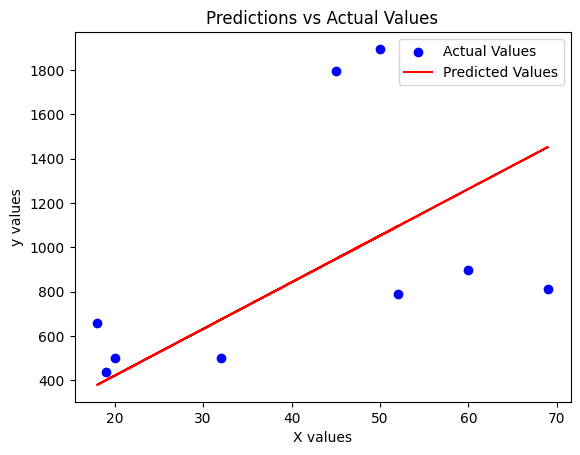

In [14]:
# Training the model on our apartment data:
model = GradientDescentModel(learning_rate=0.000005, n_iterations=500)
#model.fit(X[:,1], Y[:,0])
model.fit_vector(X[:,1], Y[:,0])

# Retrieve the MSE history
mse_history = model.get_mse_history()
predictions = model.predict(X[:,1])

# Assume mse_history contains the recorded MSE over iterations
plt.plot(mse_history)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Curve: MSE over Iterations')
plt.show()

# Assume you have predicted values and actual values
plt.scatter(X[:,1], Y[:,0], color='blue', label='Actual Values')
plt.plot(X[:,1], predictions, color='red', label='Predicted Values')
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()


---

## 2.2 Multi-dimensional model

Adapt your class from above and use two input dimensions (X is a stacked input version -- check if this is still the case). A third dimension is the bias for which a constant of `1` was added to each entry (at index 0). 

Now build a class GradientDescentModel_vector that deals with numpy array operations (only the outer iterations loop) is still used.

In [15]:
class GradientDescentModel_vector:
    """
    A linear regression model with gradient descent that handles multiple input dimensions.
    The input X is expected to have a bias column (1s) as the first column.
    """
    
    def __init__(self, learning_rate=0.0001, n_iterations=1000):
        self.learning_rate = learning_rate  # Set learning rate for gradient descent
        self.n_iterations = n_iterations  # Set number of iterations for gradient descent
        self.weights = None  # Weights vector (including bias weight)
        self.mse_history = []  # List to store MSE at each iteration

    def fit(self, X, y):
        """
        Fit the model using gradient descent. Adjust weights (including bias) iteratively.

        Parameters:
        X : numpy array, shape (n_samples, n_features)
            The independent variables with an additional bias column (first column is all 1s).
        y : numpy array, shape (n_samples,)
            The dependent variable (e.g., price of apartments).
        """
        n, d = X.shape  # n is number of samples, d is number of features (including bias)

        # Initialize weights (d values, one for each feature including the bias)
        self.weights = np.zeros(d)

        for i in range(self.n_iterations):
            # Make predictions using the current weights
            y_pred = X.dot(self.weights)  # Matrix-vector multiplication for predictions

            # Calculate the gradient for the weights (including the bias)
            gradient = (-2 / n) * X.T.dot(y - y_pred)  # Gradient vector (same length as weights)

            # Update the weights using the gradient
            self.weights -= self.learning_rate * gradient

            # Calculate Mean Squared Error for the current iteration and store it
            mse = mean_squared_error(y, y_pred)
            self.mse_history.append(mse)

            # Optionally, print the status every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}: MSE = {mse:.4f}")


    def predict(self, X):
        """
        Predict method for making predictions using the trained model.

        Parameters:
        X : numpy array, shape (n_samples, n_features)
            New data (independent variables with bias term as the first column).

        Returns:
        predictions : numpy array
            Predicted values based on the model's weights.
        """
        return X.dot(self.weights)  # Matrix-vector multiplication for predictions
    
    def get_mse_history(self):
        """
        Get the history of MSE values during the learning process.

        Returns:
        mse_history : list
            A list of MSE values recorded at each iteration.
        """
        return self.mse_history


Again, use your code for visualization from above. As we are now considering multiple input dimension, this doesn't lead to a single straight line anymore, but we are seeing projections onto individual planes.

* For a line representation, order the sequence of inputs along the specific input dimension (is already done for first dimension below)
* Extend it towards a second input dimension. 

Consider, how computing whole batches for a gradient update improves training:

* Compare the predictions with the simpler model.
* Learn for a longer time -- and test again different learning rates.

Iteration 0: MSE = 1114716.6667
Iteration 100: MSE = 228767.2903
Iteration 200: MSE = 213312.9623
Iteration 300: MSE = 210083.5160
Iteration 400: MSE = 207907.0355
Iteration 500: MSE = 205996.9821
Iteration 600: MSE = 204183.4873
Iteration 700: MSE = 202425.4941
Iteration 800: MSE = 200712.4528
Iteration 900: MSE = 199041.0925
Iteration 1000: MSE = 197409.8932
Iteration 1100: MSE = 195817.7695
Iteration 1200: MSE = 194263.7565
Iteration 1300: MSE = 192746.9352
Iteration 1400: MSE = 191266.4138
Iteration 1500: MSE = 189821.3234
Iteration 1600: MSE = 188410.8158
Iteration 1700: MSE = 187034.0635
Iteration 1800: MSE = 185690.2586
Iteration 1900: MSE = 184378.6126


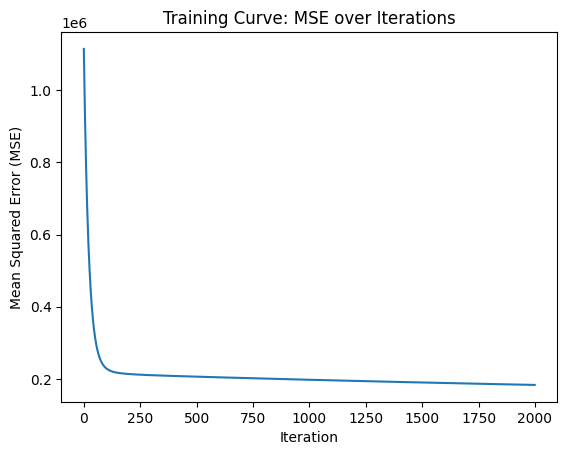

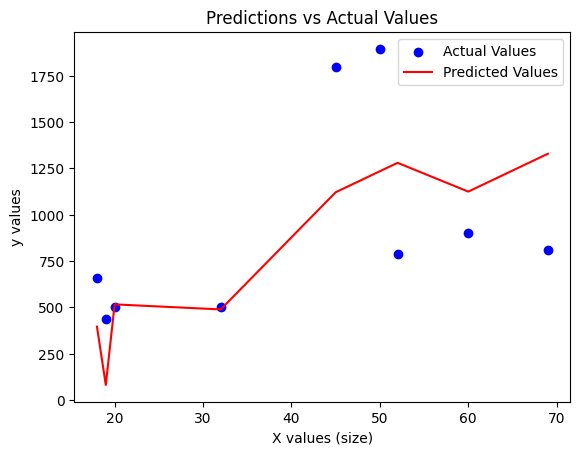

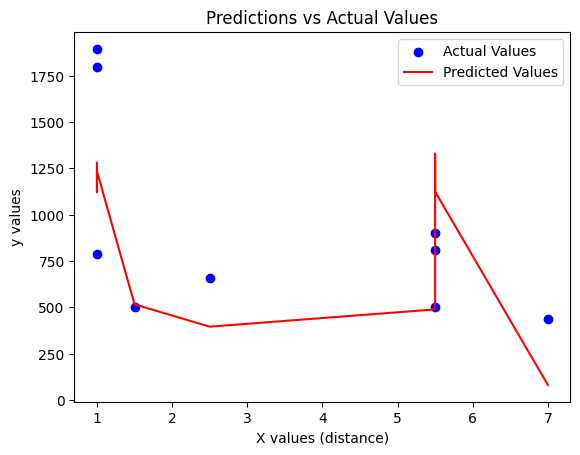

In [16]:
# Create and train the model
model = GradientDescentModel_vector(learning_rate=0.0005, n_iterations=2000)
model.fit(X, Y[:, 0])  # Fit the model

# Retrieve the MSE history and predictions
mse_history = model.get_mse_history()
predictions = model.predict(X)

# Sort the X values and corresponding predictions for smooth line plotting
sorted_indices = np.argsort(X[:, 1])  # Get indices that would sort X[:, 1]
sorted_X = X[sorted_indices, 1]  # Sort X[:, 1]
sorted_predictions = predictions[sorted_indices]  # Sort predictions using the same indices
sorted_indices = np.argsort(X[:, 2])  # Get indices that would sort X[:, 1]
sorted_X_2 = X[sorted_indices, 2]  # Sort X[:, 1]
sorted_predictions_2 = predictions[sorted_indices]  # Sort predictions using the same indices

# Plot the training curve (MSE over iterations)
plt.plot(mse_history)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Curve: MSE over Iterations')
plt.show()

# Plot predictions vs actual values
plt.scatter(X[:, 1], Y[:, 0], color='blue', label='Actual Values')  # X[:, 1] is the first feature (without bias)
plt.plot(sorted_X, sorted_predictions, color='red', label='Predicted Values')
plt.xlabel('X values (size)')
plt.ylabel('y values')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()

# Plot predictions vs actual values
plt.scatter(X[:, 2], Y[:, 0], color='blue', label='Actual Values')  # X[:, 1] is the first feature (without bias)
plt.plot(sorted_X_2, sorted_predictions_2, color='red', label='Predicted Values')
plt.xlabel('X values (distance)')
plt.ylabel('y values')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()

### 3D Visualization of fitted linear model

Below is an example how to visualize a 3D plane in matplotlib. 

* Adapt it to visualize the plane spanned by the model,
* plot the real data points and
* include dotted lines indicating the error for the data.

For more information on parameters for 3D plotting see the [documentation of matplotlib](https://matplotlib.org/stable/gallery/mplot3d/index.html).

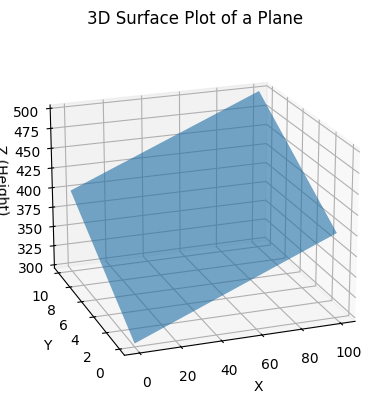

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# Define the corner points for X and Y
# This gives 4 points = 2 x 2 permutations of the two different arrays.
# TODO: You have to adapt this for showing the model plane.
# Consider: 
# - How many points do you need to span the linear plane?
# - which should you use?
x_plane = np.array([0, 100])
y_plane = np.array([0, 10])

# Create a mesh grid from the corner points
X_plane, Y_plane = np.meshgrid(x_plane, y_plane)

# Define the corresponding Z (height) values for each corner
# TODO: And here you have to use projected values
Z_plane = np.array([[300, 400], [400, 500]])

# Create a figure for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a surface plot, with color shading based on Z
surf = ax.plot_surface(X_plane, Y_plane, Z_plane, alpha=0.6)
ax.view_init(elev=20, azim=-110)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z (Height)')

# Set a title
ax.set_title('3D Surface Plot of a Plane')

# Show the plot
plt.show()


[  82.1225713   489.54014041 1329.40147982 1125.11088375  516.70241912
  396.41707385 1280.51270045 1121.62001462 1235.11479022]


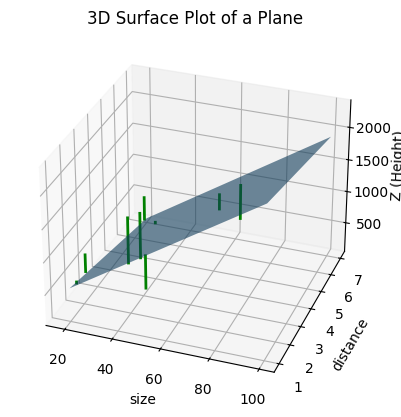

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# Define the corner points for X and Y
# This gives 4 points = 2 x 2 permutations of the two different arrays.
# Consider: 
# - How many points do you need to span the linear plane?
# - which should you use?
x_plane = np.array([20, 100])
y_plane = np.array([1, 7])

# Create a mesh grid from the corner points
X_plane, Y_plane = np.meshgrid(x_plane, y_plane)

# Define the corresponding Z (height) values for each corner
corners = np.array([[1,x_plane[0],y_plane[0]],[1,x_plane[1],y_plane[0]],[1,x_plane[0],y_plane[1]],[1,x_plane[1],y_plane[1]]])
predictions_plane = model.predict(corners)
Z_plane = np.array([[predictions_plane[0], predictions_plane[1]], [predictions_plane[2], predictions_plane[3]]])
print(predictions)

# Create a figure for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a surface plot, with color shading based on Z
surf = ax.plot_surface(X_plane, Y_plane, Z_plane, alpha=0.6)
ax.view_init(elev=30, azim=-70)

for i in range(len(predictions)):
    ax.plot([X[i,1], X[i,1]], [X[i,2], X[i,2]], [Y[i,0], predictions[i]], 
        color='green', linewidth=2)


# Set labels
ax.set_xlabel('size')
ax.set_ylabel('distance')
ax.set_zlabel('Z (Height)')

# Set a title
ax.set_title('3D Surface Plot of a Plane')

# Show the plot
plt.show()


---

# 2.3 Finding the Optimal Values Analytically for Simple Linear Regression

In this task, you are required to compute the optimal slope $(m)$ and intercept $(b)$ analytically for a simple linear regression problem (we are starting with the simple one dimensional input case again). Instead of using iterative methods like gradient descent or brute-force optimization, you will directly calculate the values of 
$m$ and $b$ that minimize the Mean Squared Error (MSE) using closed-form solutions.

**Overview:**

For simple linear regression, the relationship between the independent variable $(x)$ (e.g., apartment size) and the dependent variable $(y)$ (e.g., price) is modeled as:
$$
y = m \cdot x + b
$$

Where:
- $m$ is the slope (or coefficient) that determines how much $y$ changes as $x$ changes.
- $b$ is the intercept, which is the value of $y$ when $x = 0$.

The goal is to find the values of $m$ and $b$ that minimize the *Mean Squared Error (MSE)*. This can be done analytically using the following closed-form equations.

Try to find the analytical solution -- i.e. for a given function you are searching for local optima (characterized by gradients that equal zero).

**Analytical Solutions for $m$ and $b$:**

The optimal slope \(m\) and intercept \(b\) for linear regression can be found using the *least squares method*:

1. *Optimal Slope ($m$)*:
$$
   m = \frac{n \sum x_i y_i - \sum x_i \sum y_i}{n \sum x_i^2 - \left( \sum x_i \right)^2}
$$

Where:

* $n$ is the number of data points.
* $\sum x_i y_i$ is the sum of the products of $x_i$ and $y_i$.
* $\sum x_i$ is the sum of the $x$-values.
* $\sum y_i$ is the sum of the $y$-values.
* $\sum x_i^2$ is the sum of the squared $x$-values.

2. *Optimal Intercept ($b$)*:
$$
   b = \frac{\sum y_i - m \sum x_i}{n}
$$

Where $m$ is the slope computed from the formula above.

**Task Instructions:**

1. Compute the sums required for the formulae above.
2. Use the formulae provided above to compute the optimal slope $m$ and intercept $b$.
3. Once you have the analytical solutions for $m$ and $b$, use them to predict $y$-values for any given $x$-values (e.g., apartment sizes) and compare the predictions with the actual prices.
4. Calculate the Mean Squared Error (MSE) for these predictions to verify that the analytically computed values for $m$ and $b$ minimize the error.

In [19]:
class OptimalLinearModel:
    """
    A simple linear regression model that directly calculates the optimal slope and intercept
    using the closed-form solution (normal equation) for simple linear regression.
    """
    
    def __init__(self):
        self.slope = None  # Initialize slope (m)
        self.intercept = None  # Initialize intercept (b)

    def fit(self, X, y):
        """
        Fit the model by directly calculating the optimal slope and intercept.
        Parameters:
        X : list or array-like, shape (n_samples,)
            The independent variable (e.g., size of apartments).
        y : list or array-like, shape (n_samples,)
            The dependent variable (e.g., price of apartments).
        """
        # Convert X and y to numpy arrays
        X = np.array(X)
        y = np.array(y)
        
        n = len(X)  # Number of data points

        # Calculate the slope (m) using the closed-form solution
        numerator = n * np.sum(X * y) - np.sum(X) * np.sum(y)
        denominator = n * np.sum(X**2) - (np.sum(X)**2)
        self.slope = numerator / denominator

        # Calculate the intercept (b)
        self.intercept = (np.sum(y) - self.slope * np.sum(X)) / n

    def predict(self, X):
        """
        Predict method for making predictions using the trained model.

        Parameters:
        X : list or array-like, shape (n_samples,)
            New data (independent variable) to predict the dependent variable.

        Returns:
        predictions : list
            Predicted values based on the model's slope and intercept.
        """
        return [self.slope * x + self.intercept for x in X]
    
    def mse(self, X, y):
        y_pred = self.predict(X)
        mse = mean_squared_error(y_pred, y)
        return mse


And we finally calculate the optimal values -- and visualize this optimal linear model (optimal in the sense that it minimizes MSE).

Remarks on optimal solution:

* No Iterative Updates: The weights are computed directly using the normal equation, which gives the optimal solution in one step.
* Efficient for Small Data: This approach works well for small datasets.
* But: computing the inverse of large matrices can be computationally expensive for large datasets.
* Accurate: The normal equation provides the exact solution, so there is no need for tuning parameters like the learning rate or number of iterations.


MSE:  215077.85056310048


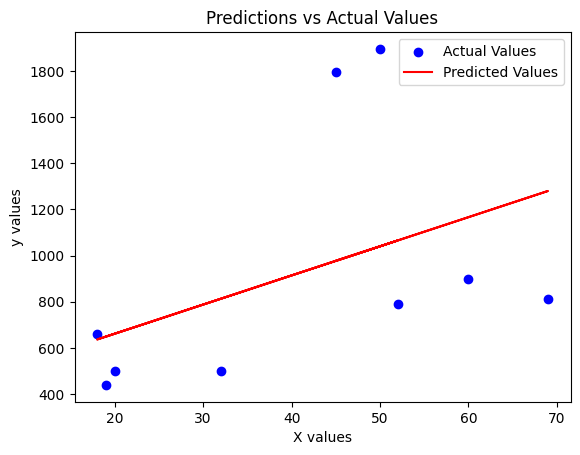

In [20]:
# Fit the optimal model
model = OptimalLinearModel()
#model.fit(X[:,1], Y[:,0])
model.fit(X[:,1], Y[:,0])

# Retrieve the MSE history
predictions = model.predict(X[:,1])
print("MSE: ", model.mse(X[:,1], Y[:,0]))

# Assume you have predicted values and actual values
plt.scatter(X[:,1], Y[:,0], color='blue', label='Actual Values')
plt.plot(X[:,1], predictions, color='red', label='Predicted Values')
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()


### Optimal Solution for multidimensional case

In this version of the linear regression model, we are using the **Normal Equation** to directly compute the optimal weights for a multivariate linear regression problem. The **Normal Equation** provides a closed-form solution for the parameters (weights), avoiding the need for iterative optimization methods like gradient descent. 

### Task List:
- **Input Representation**: The input matrix $\mathbf{X}$ is expected to have a bias column of ones as the first column, with subsequent columns representing the features.
- **Weights Calculation**: The optimal weights $\mathbf{w}$ are calculated using the following formula:
  $$
  \mathbf{w} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
  $$
- **Prediction**: Once the weights are calculated, the prediction for any new data $\mathbf{X}_{\text{new}}$ is done using matrix-vector multiplication:
  $$
  \hat{\mathbf{y}} = \mathbf{X}_{\text{new}} \mathbf{w}
  $$


In [21]:
class OptimalLinearModel_vector:
    """
    A linear regression model that directly calculates the optimal weights 
    using the normal equation (closed-form solution) for multiple input dimensions.
    The input X is expected to have a bias column (1s) as the first column.
    """
    
    def __init__(self):
        self.weights = None  # Weights vector (including bias weight)

    def fit(self, X, y):
        """
        Fit the model by directly calculating the optimal weights using the normal equation.

        Parameters:
        X : numpy array, shape (n_samples, n_features)
            The independent variables with an additional bias column (first column is all 1s).
        y : numpy array, shape (n_samples,)
            The dependent variable (e.g., price of apartments).
        """
        # Compute the optimal weights using the normal equation
        X_transpose = X.T
        self.weights = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)

    def predict(self, X):
        """
        Predict method for making predictions using the trained model.

        Parameters:
        X : numpy array, shape (n_samples, n_features)
            New data (independent variables with bias term as the first column).

        Returns:
        predictions : numpy array
            Predicted values based on the model's weights.
        """
        return X.dot(self.weights)  # Matrix-vector multiplication for predictions
    
    def mse(self, X, y):
        y_pred = self.predict(X)
        mse = mean_squared_error(y_pred, y)
        return mse


Again, we use code from above for visualization.

MSE multidimensional model:  130881.36942821162


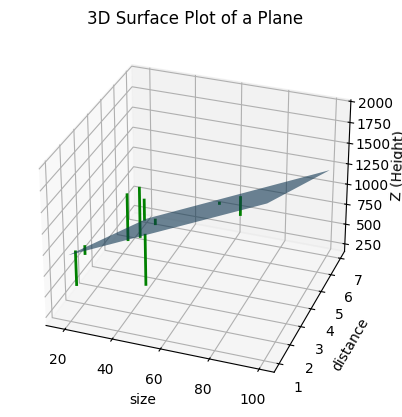

In [22]:
# Create and train the model
model = OptimalLinearModel_vector()
model.fit(X, Y[:, 0])  # Fit the model

predictions = model.predict(X)

print("MSE multidimensional model: ", model.mse(X, Y[:, 0]))

from mpl_toolkits.mplot3d import Axes3D

# Define the corner points for X and Y
# This gives 4 points = 2 x 2 permutations of the two different arrays.
# Consider: 
# - How many points do you need to span the linear plane?
# - which should you use?
x_plane = np.array([20, 100])
y_plane = np.array([1, 7])

# Create a mesh grid from the corner points
X_plane, Y_plane = np.meshgrid(x_plane, y_plane)

# Define the corresponding Z (height) values for each corner
corners = np.array([[1,x_plane[0],y_plane[0]],[1,x_plane[1],y_plane[0]],[1,x_plane[0],y_plane[1]],[1,x_plane[1],y_plane[1]]])
predictions_plane = model.predict(corners)
Z_plane = np.array([[predictions_plane[0], predictions_plane[1]], [predictions_plane[2], predictions_plane[3]]])

# Create a figure for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a surface plot, with color shading based on Z
surf = ax.plot_surface(X_plane, Y_plane, Z_plane, alpha=0.6)
ax.view_init(elev=30, azim=-70)

for i in range(len(predictions)):
    ax.plot([X[i,1], X[i,1]], [X[i,2], X[i,2]], [Y[i,0], predictions[i]], 
        color='green', linewidth=2)


# Set labels
ax.set_xlabel('size')
ax.set_ylabel('distance')
ax.set_zlabel('Z (Height)')

# Set a title
ax.set_title('3D Surface Plot of a Plane')

# Show the plot
plt.show()


## Final Remarks / Check for your Understanding

Briefly check your understanding of:

* the learning curve 
* the learning rate
    * How to find an optimal one? And what does optimal mean?
    * What can happen with a learning rate that is too high or too low? 
    * To avoid long learning times -- what could you improve in the approach?
* the choice of initial values

Further questions:

* Do you have an idea and can explain why gradient descent sometimes diverges and goes off rails?
* What is a disadvantage of the analytical optimization approach?
* How would you handle multiple output values (there is one further output given)?
* Which is the best approach? And in what sense?
* What are we actually measuring -- and what would we have to do to measure generalization?

<div style="text-align: right;">
<i>This notebook has been created with the help of ChatGPT-4, 15.10.2024; Explanations were initially generated and afterwards edited;</i>
</div>